In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
import seaborn as sns

In [3]:
PATH = './dataset_nonIID'

In [4]:
for i in range(1, 5):
    benign = f"{PATH}/client_{i}/client_{i}_benign.csv"
    attack = f"{PATH}/client_{i}/client_{i}_known_attack.csv"
    #dataframe = pd.concat([pd.read_csv(benign), pd.read_csv(attack)], ignore_index=True)
    locals()[f"client_{i}"] = pd.concat([pd.read_csv(benign), pd.read_csv(attack)], ignore_index=True)
    print(locals()[f"client_{i}"].groupby(['Label']).size().reset_index(name="Count"))

   Label   Count
0      0  200000
1      1  200000
   Label   Count
0      0  185943
1      1  200000
   Label   Count
0      0  200000
1      1  200000
   Label   Count
0      0  200000
1      1  200000


## Fwd PSH flags: Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)

## Fwd Act Data Pkts: Count of packets with at least 1 byte of TCP data payload in the forward direction

## Manual Feature Analysis

In [20]:
#client_3_dataset = locals()['client_3'].copy()

In [21]:
#client_3_dataset = client_3_dataset[features]

In [5]:
def measure_correlation(df, co_efficent=0.2):
    # Calculate correlation matrix for numeric features
    correlation_matrix = df.corr()    
    # Find features with low correlation with other features
    # We use 0.2 as the threshold for weak correlation (you can adjust it as needed)

    # We use 0.2 as the threshold for weak correlation (you can adjust it as needed)
    independent_features = correlation_matrix[correlation_matrix.abs() < co_efficent].count().sort_values(ascending=False)
    
    # Create a DataFrame with the feature names and their respective counts of low-correlation (independent) scores
    independent_features_df = pd.DataFrame({
        'Feature': independent_features.index,
        'Score': independent_features.values
    })
     

    # Draw a heatmap for the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    
    # Display the heatmap
    plt.title('Correlation Matrix of Features')
    plt.show()
    return independent_features_df

In [6]:
##IAT Features 41 features
test_features = ['Flow Duration' ,'Total Fwd Packet' ,'Total Bwd packets' ,'Total Length of Fwd Packet' ,'Total Length of Bwd Packet' ,'Fwd Packet Length Max' ,'Fwd Packet Length Min' ,'Fwd Packet Length Std' ,'Bwd Packet Length Max' ,'Bwd Packet Length Min' ,'Bwd Packet Length Std' ,'Flow IAT Mean' ,'Flow IAT Std' ,'Flow IAT Max' ,'Flow IAT Min' ,'Fwd IAT Total' ,'Fwd IAT Std' ,'Fwd IAT Max' ,'Fwd IAT Min' ,'Bwd IAT Total' ,'Bwd IAT Std' ,'Bwd IAT Max' ,'Bwd IAT Min' ,'Fwd Header Length' ,'Bwd Header Length' ,'Packet Length Min' ,'Packet Length Max' ,'Packet Length Std' ,'Packet Length Variance' ,'FWD Init Win Bytes' ,'Bwd Init Win Bytes' ,'Fwd Act Data Pkts' ,'Fwd Seg Size Min' ,'Active Mean' ,'Active Std' ,'Active Max' ,'Active Min' ,'Idle Mean' ,'Idle Std' ,'Idle Max' ,'Idle Min']

client_1


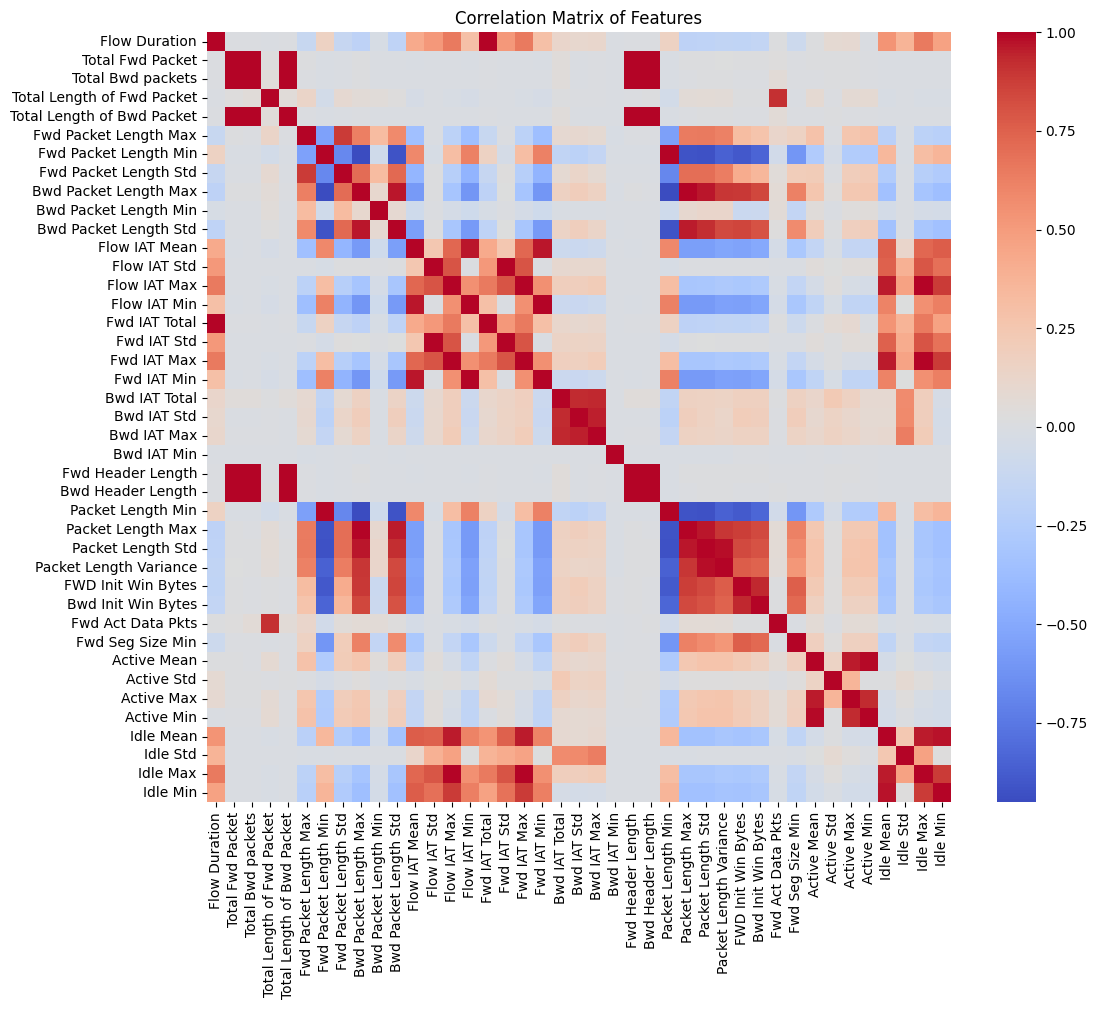

client_2


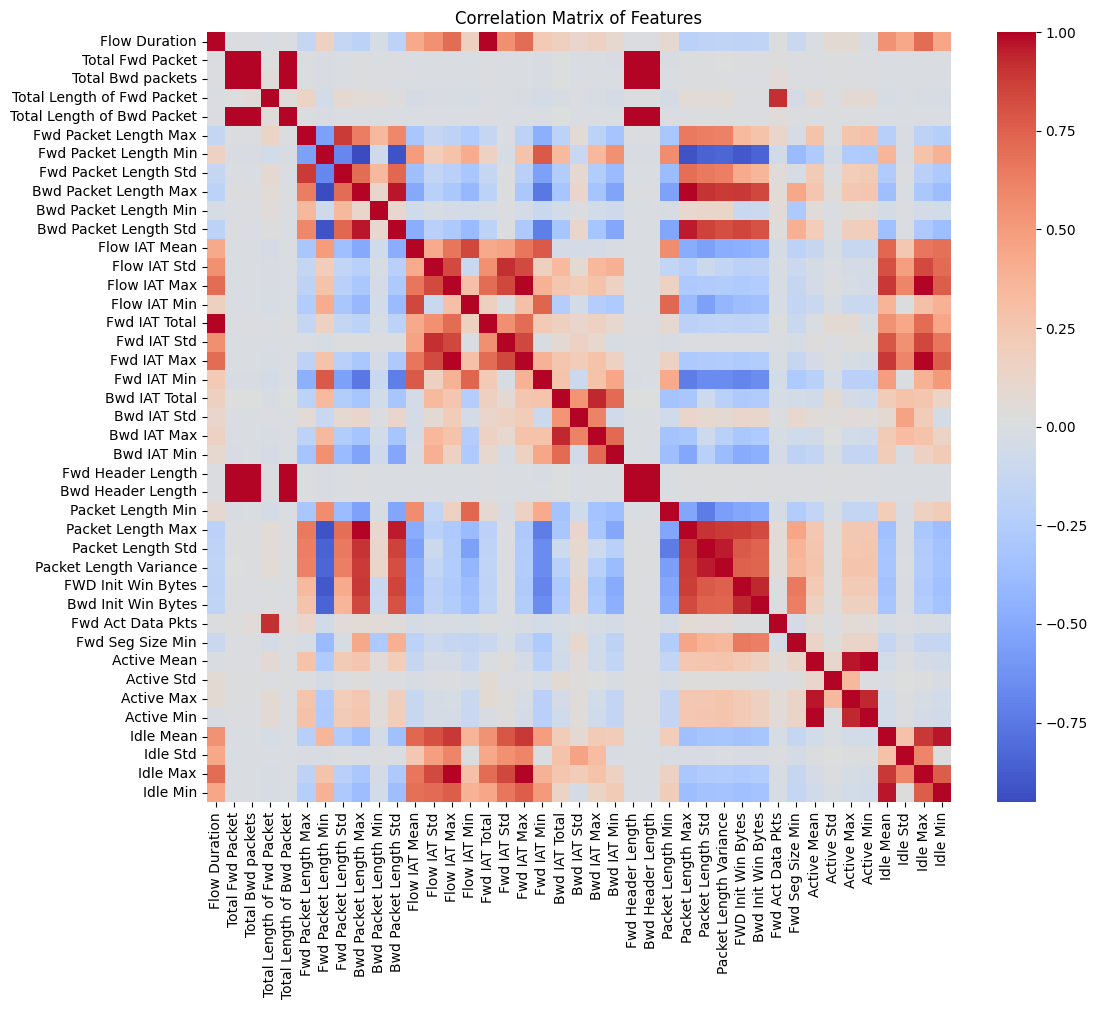

client_3


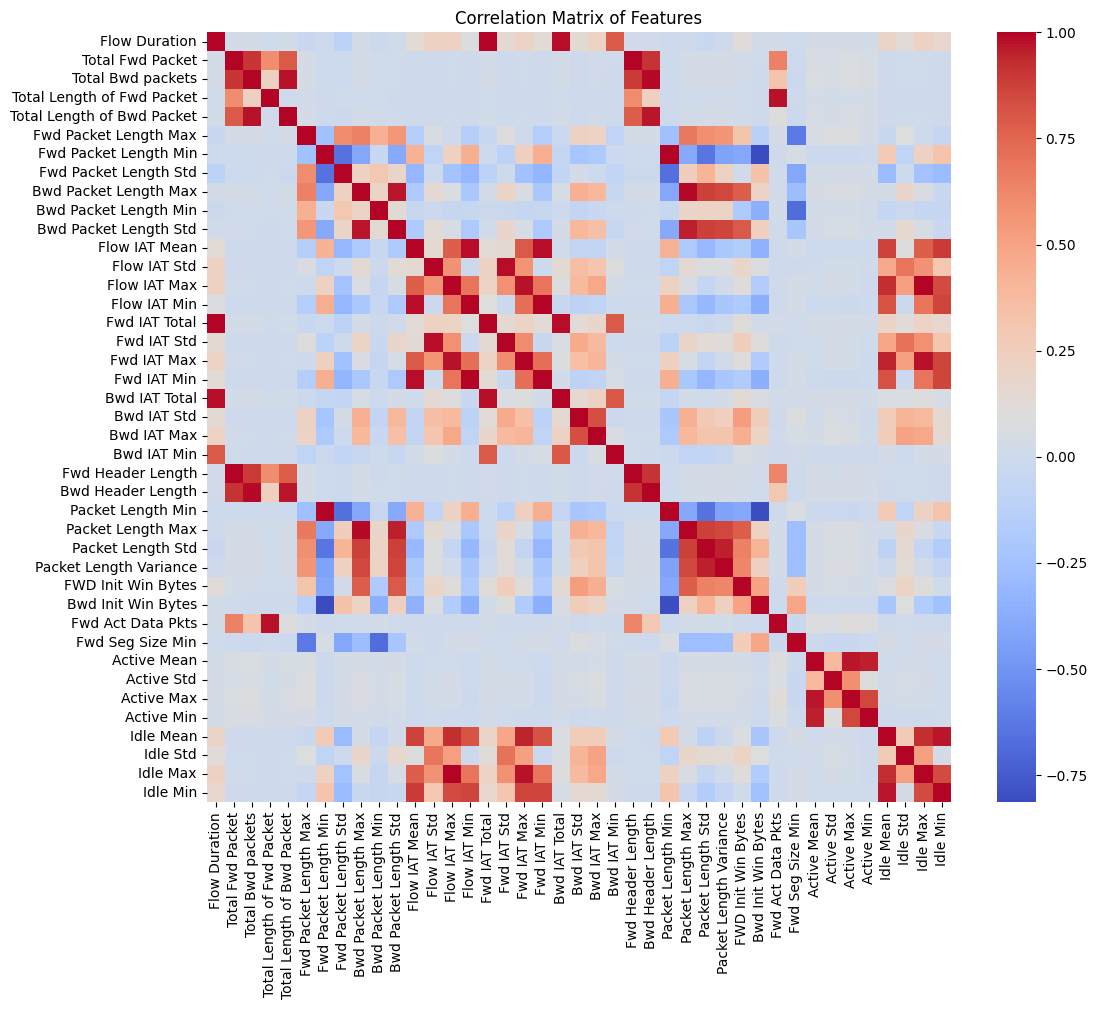

client_4


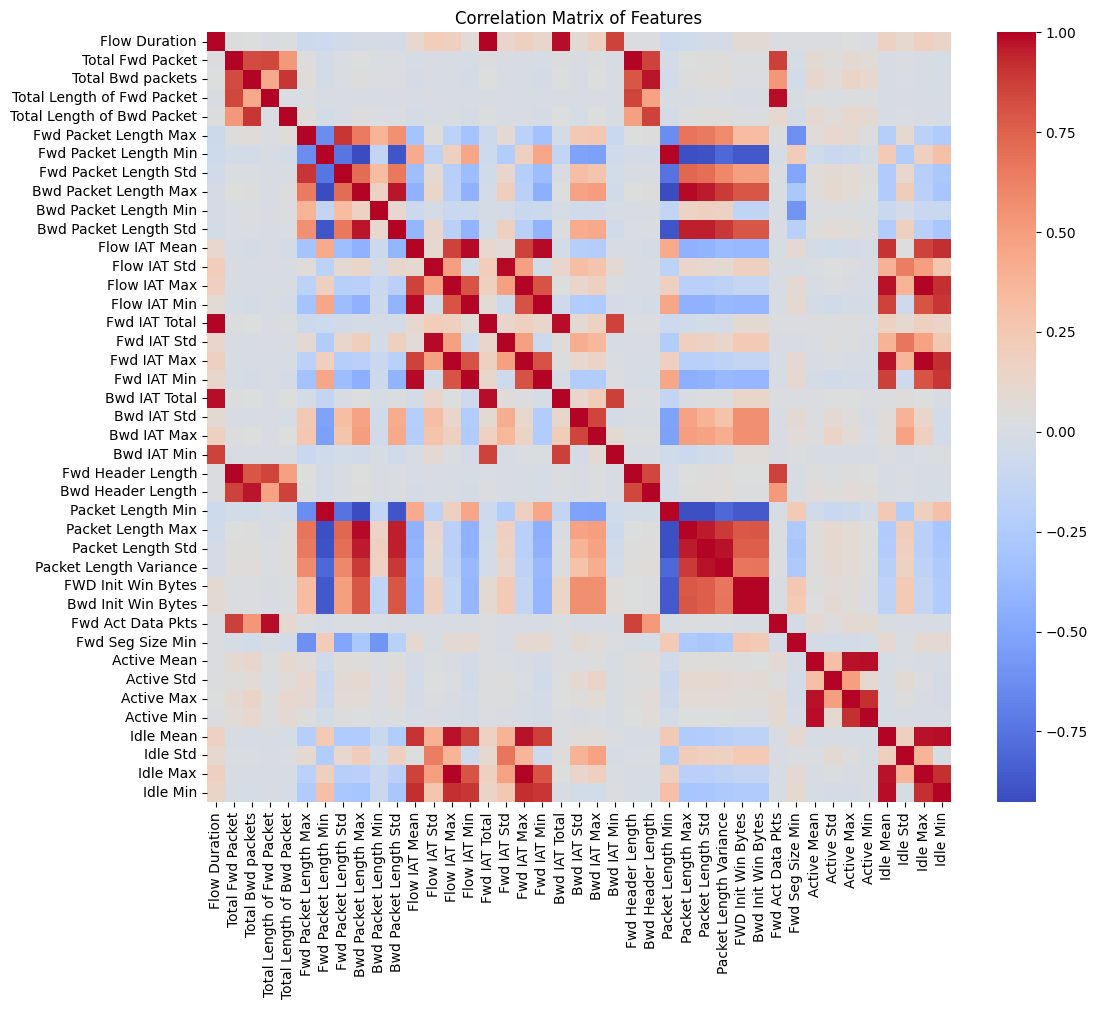

In [8]:
# Assuming 'clients' is a dictionary of client dataframes
all_independent_features = pd.DataFrame()

for i in range(1, 5):
    key = f"client_{i}"
    print(key)
    independent_features_df =  measure_correlation(locals()[key][test_features], 0.01)
     # Rename 'Score' column to 'Score_X' where X is the current iteration number
    independent_features_df.rename(columns={'Score': f'Score_{key}'}, inplace=True)

    # Merge the results to keep the 'Feature' column as the common key
    if all_independent_features.empty:
        all_independent_features = independent_features_df
    else:
        all_independent_features = pd.merge(all_independent_features, independent_features_df, on='Feature', how='outer')

    
# Display the final combined DataFrame
#print(all_independent_features)  

In [9]:
all_independent_features.to_csv("./Generated_Feature_FL_non_FL_nonIID/Independence_Scores.csv", index=False)